In [6]:
#bsef19m010
#Nimra Haq

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math

True

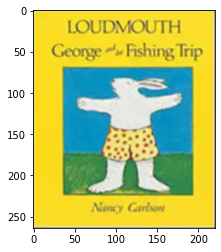

In [9]:
def ConvolutionGrayScale(image2D, kernel):
    
    # the image we got is 2D
    
    padding = math.floor(kernel.shape[0] /2)  #we have the number of rows/cols we need to add to sides for the image.
    
    paddedImage = np.zeros((image2D.shape[0] + padding + padding, image2D.shape[1] + padding + padding))
    
    #now storing values in "paddedImage"
    x = 0
    for i in range (padding, paddedImage.shape[0] - padding):
        y = 0
        for j in range (padding, paddedImage.shape[1] - padding):
            paddedImage[i][j] = image2D[x][y]
            y += 1
        x +=1
    #we have got the padded image!
    #now we can apply convolution
    
    resultImage = np.zeros((image2D.shape[0], image2D.shape[1]))
    
    x = 0  #index for result image
    for i in range (padding, paddedImage.shape[0] - padding):
        y = 0   #index for result image
        for j in range (padding, paddedImage.shape[1] - padding):
            result = 0
            for a in range(0, kernel.shape[0]) :
                for b in range(0 , kernel.shape[1]):
                    result += kernel[a][b] * paddedImage[(i - padding) + a][(j - padding) + b]
            
            resultImage[x][y] = result
            y += 1
        x += 1
    return resultImage
                
            
    
def Convolution(image, kernel):
    
    #basic checks on kernel
    if(kernel.shape[0] != kernel.shape[1]):   #if kernal is not square matrix
            return
    elif(kernel.ndim != 2):                   #if kernel is not 2 dimensional
            return 
    elif(kernel.shape[0] % 2 == 0):           #if kernel shape is even
            return
    
    #the mask is symmetric, so we do not need to flip it
    
    if(image.ndim == 3):   #if the image is coloured
       
        resultImg = np.zeros((image.shape[0], image.shape[1], image.shape[2]))
        #now we are going to separate the red, blue, green channels in image
        # they would be individual gray scale images
        blue_channel = image[:,:,0]
        green_channel = image[:,:,1]
        red_channel = image[:,:,2]
    
        #now we are going to apply convolution on these grayScale images
        resultImg[:,:,2] = ConvolutionGrayScale(blue_channel , kernel)
        resultImg[:,:,1] = ConvolutionGrayScale(green_channel , kernel)
        resultImg[:,:,0] = ConvolutionGrayScale(red_channel , kernel)
        return resultImg

#smoothing kernel 3  by 3
image = cv.imread("book.png")
kernel = (1/9)*(np.ones((3,3)))
image = Convolution(image, kernel)

plt.imshow(image.astype('uint8'))
cv.imwrite("smoothing_filter1.jpg", image)

True

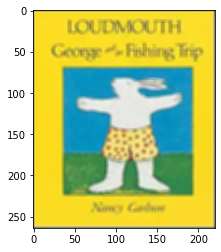

In [3]:
#smoothing kernel 5  by 5
image = cv.imread("book.png")
kernel = (1/25)*(np.ones((5,5)))
image = Convolution(image, kernel)
plt.imshow(image.astype('uint8'))
cv.imwrite("smoothing_filter2.jpg", image)

True

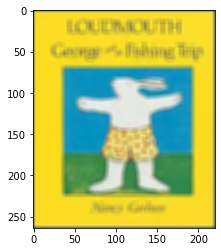

In [4]:
#smoothing kernel 7 by 7
image = cv.imread("book.png")
kernel = (1/49)*(np.ones((7,7)))
image = Convolution(image, kernel)
plt.imshow(image.astype('uint8'))
cv.imwrite("smoothing_filter3.jpg", image)

True

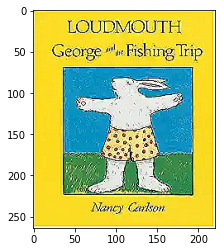

In [5]:
#Sharpening kernel (3 × 3)
image = cv.imread("book.png")
kernel = np.array([[0, -1,  0],
                       [-1,  5, -1],
                       [0, -1,  0]])
image = Convolution(image, kernel)
image = np.clip(image, 0 , 255)
plt.imshow(image.astype('uint8'))
cv.imwrite("sharpening_filter.jpg", image)
